In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Interaction Effect (Synergy Effect)
- Assumption: two independent variables $x_1\ and\ x_2$ and one dependent variable $(y)$
- The interaction effect also known as synergy effect lets us know the combined effect of multiple variables $x's$ on the $y$
- To know the interaction effect of multiple features over the output label, we multiply the features as $x_1\times x_2$
- And calculate the coefficient as:
$$ y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_3(x_1.x_2) + \epsilon$$
    - here, $\beta_3$ provides synergy effect between the variables $x_1\ and\ x_2$
#### Example:
- In the advertising dataset the interaction effect can be analyzed by a beta coefficient of the product between multple features to examine whether it will be effective to advertise in only one or two or three variables such that it will generate maximum sales 

# Higher Order Relationship
- Assumption: independent variable $(x)$ and dependent variable $(y)$
- If the relationship between the $x\ and\ y$ is not linear we can engineer $x$ to higher order
- For example, we can generate quadratic and cubic relationship as following:
    - Calculating $x^2\ and\ x^3$ from $x$
    - Quadratic Model: $y=\beta_0 + \beta_1x + \beta_2x^2 + \epsilon$
    - Cubic Model : $y=\beta_0 + \beta_1x + \beta_2x^2 + \beta_3x^3 + \epsilon$

### Scikit-learn Preprocessing library
- sklearn preprocessing library contains tools to apply to the original data before training a model
- The tool called `PolynomialFeatures` contains both higher order feature polynomials and interaction terms
- The feature created includes:
    1. The bias (the value of 1.0)
    2. values raised to the power of degrees (i.e $x^2, x^3, ...$)
    3. interactions between all pairs of features. (i.e $x_1x_2, x_1x_3 .....$)
- Generalized term, if a data set has features $x_1\ and\ x_2$
    - 1, $x_1$, $x_2$,$x_1^2$, $x_1 \times x_2$, $x_2^2$

In [2]:
df = pd.read_csv("Advertising.csv")
df.head(1)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1


In [3]:
df.drop("Unnamed: 0",axis =1, inplace=True)

In [4]:
X = df.drop("sales",axis = 1)
y= df["sales"]

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [6]:
X.shape

(200, 3)

In [7]:
poly_converter = PolynomialFeatures(degree =2 , include_bias= False)
poly_fit = poly_converter.fit(X)
poly_features= poly_fit.transform(X)
# The polyfit and polyTransform can be done in one step
# polyfeatures = poly_convertor.fit_transform(X)

In [8]:
poly_features.shape

(200, 9)

- It is possible to fit one set of data and trainsform it to other, if both are identical dataset, unless we are transforming other to fit on another we can do it in single with method `fit_transform(X)`
- The polyfit and polytranform can be done in single line
- the polyfit returns an object on which we can transform original features to polyfeatures those containing original features, interaction effect features and polynomial features of defined degree

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features,y,test_size=0.3, random_state = 101)

In [37]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [38]:
model.score(X_train,y_train)

0.9868638137712757

In [39]:
model.score(X_test,y_test)

0.9843529333146792

In [40]:
model.coef_


array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [41]:
predication_value= model.predict(X_test)

In [42]:
#Erros
MAE = mean_absolute_error(y_test,predication_value)
MAE

np.float64(0.4896798044803672)

In [43]:
MSE = mean_squared_error(y_test,predication_value)
RMSE= np.sqrt(MSE)
RMSE, MSE

(np.float64(0.6646431757269089), np.float64(0.44175055104035066))

#np.float64(1.3603977338130553) RMES in previous linear model

In [44]:
# checking the mse for train data
predication_value_train= model.predict(X_train)
MSE = mean_squared_error(y_train,predication_value_train)
MSE
# here the test_MSE is not smaller than train_MSE. hence we can say that the model is overfitted

np.float64(0.3456939142443996)

In [45]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [46]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [47]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

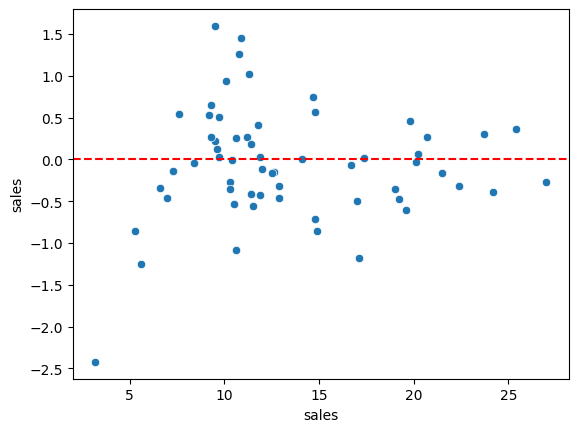

In [48]:
# plotting residual error
test_residual = y_test - predication_value
sns.scatterplot(x= y_test, y= test_residual)
plt.axhline(y =0,ls='--',color='r')
plt.show()